In [1]:
import os

# Change to the parent directory
os.chdir('../..')

# Verify the path using getcwd()
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: c:\Users\onyer\OneDrive\Desktop\Research work\1. Projects\Battery_Analysis1


In [2]:
# import deepSI
from warnings import simplefilter
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.model_fitting import fit_and_plot_cycle
import src.plotting as ptt
from src.file_loader import load_csv_files
from src.model_fitting import fit_and_plot_cycle
from src.model import arx_model
import sysid_pem_toolbox.sysid_pem as sid
import scipy as sp
import control as ct
import src.file_loader as fl

from torch import nn
from sysidentpy.metrics import mean_squared_error
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.neural_network import NARXNN

from sysidentpy.basis_function._basis_function import Polynomial
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import (
    compute_residues_autocorrelation,
    compute_cross_correlation,
)
from sysidentpy.utils.narmax_tools import regressor_code
import torch

# import deepSI



from sysidentpy.model_structure_selection import FROLS, AOLS, MetaMSS
from sysidentpy.basis_function import Polynomial
from sysidentpy.parameter_estimation import LeastSquares
from sysidentpy.neural_network import NARXNN
from sysidentpy.metrics import mean_squared_error

from neuralprophet import NeuralProphet
from neuralprophet import set_random_seed


simplefilter("ignore", FutureWarning)
np.seterr(all="ignore")

%matplotlib inline

loss = mean_squared_error

from torch import nn
from sysidentpy.utils.generate_data import get_siso_data

from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import (
    compute_residues_autocorrelation,
    compute_cross_correlation,
)
from sysidentpy.utils.narmax_tools import regressor_code

c:\Users\onyer\OneDrive\Desktop\Research work\1. Projects\Battery_Analysis1\env_analysis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


11-22 09:38:08 - ERROR - Importing plotly failed. Interactive plots will not work.
11-22 09:38:08 - ERROR - Importing plotly failed. Interactive plots will not work.


In [3]:
# List of file names
file_names = [
    '9171_20240927_N11507060127_ Rapid polarization.csv',
    '9171_20240927_N11507060127_Rapid polarization-1.csv',
    '9171_20241001_N11507060127_ Rapid polarization-2.csv'
    ]

# print(f"Processing file: {file_names}")
dataframes = load_csv_files(file_names, '', 'deep learning assignment')


In [ ]:
# # Load data
# mpr_file4 = fl.load_mpr("12to1-25%CNC-3%GQDs _C01.mpr")
# df4 = pd.DataFrame(mpr_file4.data)

# # Get columns
# print("Columns:", df4.columns)
# print("Data:", df4['time/s'].head())

# df4 = df4.set_index('time/s')[['control/mA', 'Ewe/V']]

# print("Columns:", df4.columns)
# print("Data:", df4.head())

# # Plotting
# plt.figure(figsize=(12, 6))

# # Plot 'control/mA'
# plt.subplot(2, 1, 1)
# plt.plot(df4.index, df4['control/mA'], color='blue', label='Control (mA)')
# plt.xlabel('Time (s)')
# plt.ylabel('Control (mA)')
# plt.title('Control Current vs. Time')
# plt.legend()

# # Plot 'Ewe/V'
# plt.subplot(2, 1, 2)
# plt.plot(df4.index, df4['Ewe/V'], color='red', label='Ewe (V)')
# plt.xlabel('Time (s)')
# plt.ylabel('Ewe (V)')
# plt.title('Electrode Voltage vs. Time')
# plt.legend()

# # Adjust layout
# plt.tight_layout()
# plt.show()


In [ ]:
# df4.head()
# df4.shape

In [ ]:
# # List of file names
# file_names = [
#     '9171_20240626_120 s_N11503200095_Polarization_High to low_80 deg C_4 mpm_corr (1).csv',
#     '9171_20240626_120 s_N11503200095_Polarization_High to low_80 deg C_4 mpm_corr (2).csv',
#     '9171_20240626_120 s_N11503200095_Polarization_Low to high_80 deg C_4 mpm_corr (1).csv',
#     '9171_20240626_120 s_N11503200095_Polarization_Low to high_80 deg C_4 mpm_corr (2).csv',
#     '9171_20240627_120 s_N11503200095_Polarization_High to low_80 deg C_6 mpm_corr (1).csv',
#     '9171_20240627_120 s_N11503200095_Polarization_High to low_80 deg C_6 mpm_corr (2).csv',
#     '9171_20240627_120 s_N11503200095_Polarization_Low to high_80 deg C_6 mpm_corr (1).csv',
#     '9171_20240627_120 s_N11503200095_Polarization_Low to high_80 deg C_6 mpm_corr (2).csv'
# ]

# dataframes2 = load_csv_files(file_names, '','Hydrogen Project')

# # # Display the first 5 rows of each DataFrame
# # for key, df in dataframes.items():
# #     print(f"Head of DataFrame {key}:")
# #     print(df.head(5))
# #     print("\n")

In [5]:
# # Columns to check for missing values
# COLUMNS_TO_CHECK = ['Time (HH:mm:ss.SSS)', 'V', 'A']

# # Initialize a dictionary to store missing values count for each column in each DataFrame
# missing_counts = {col: {} for col in COLUMNS_TO_CHECK}

# for key, df in dataframes.items():
#     # Check for missing values in each column
#     for column in COLUMNS_TO_CHECK:
#         missing_values = df[column].isna()
#         num_missing = missing_values.sum()
        
#         # Store the count of missing values for each column in the DataFrame
#         missing_counts[column][key] = num_missing
        
#         # Display rows with missing values (optional)
#         if num_missing > 0:
#             print(f"\nNumber of missing values in '{column}' for {key}: {num_missing}")
#             print("Rows with missing values:")
#         else:
#             print(f"\nNo missing values in '{column}' for {key}.")

# # Plot missing values count for each column in each DataFrame
# fig, axes = plt.subplots(len(COLUMNS_TO_CHECK), 1, figsize=(10, 6), sharex=True)

# for i, column in enumerate(COLUMNS_TO_CHECK):
#     axes[i].bar(missing_counts[column].keys(), missing_counts[column].values(), color='skyblue')
#     axes[i].set_ylabel('Number of Missing Values')
#     axes[i].set_title(f'Missing Values in {column}')
#     axes[i].tick_params(axis='x', rotation=45)

# plt.xlabel('DataFrame Name')
# plt.tight_layout()
# plt.show()



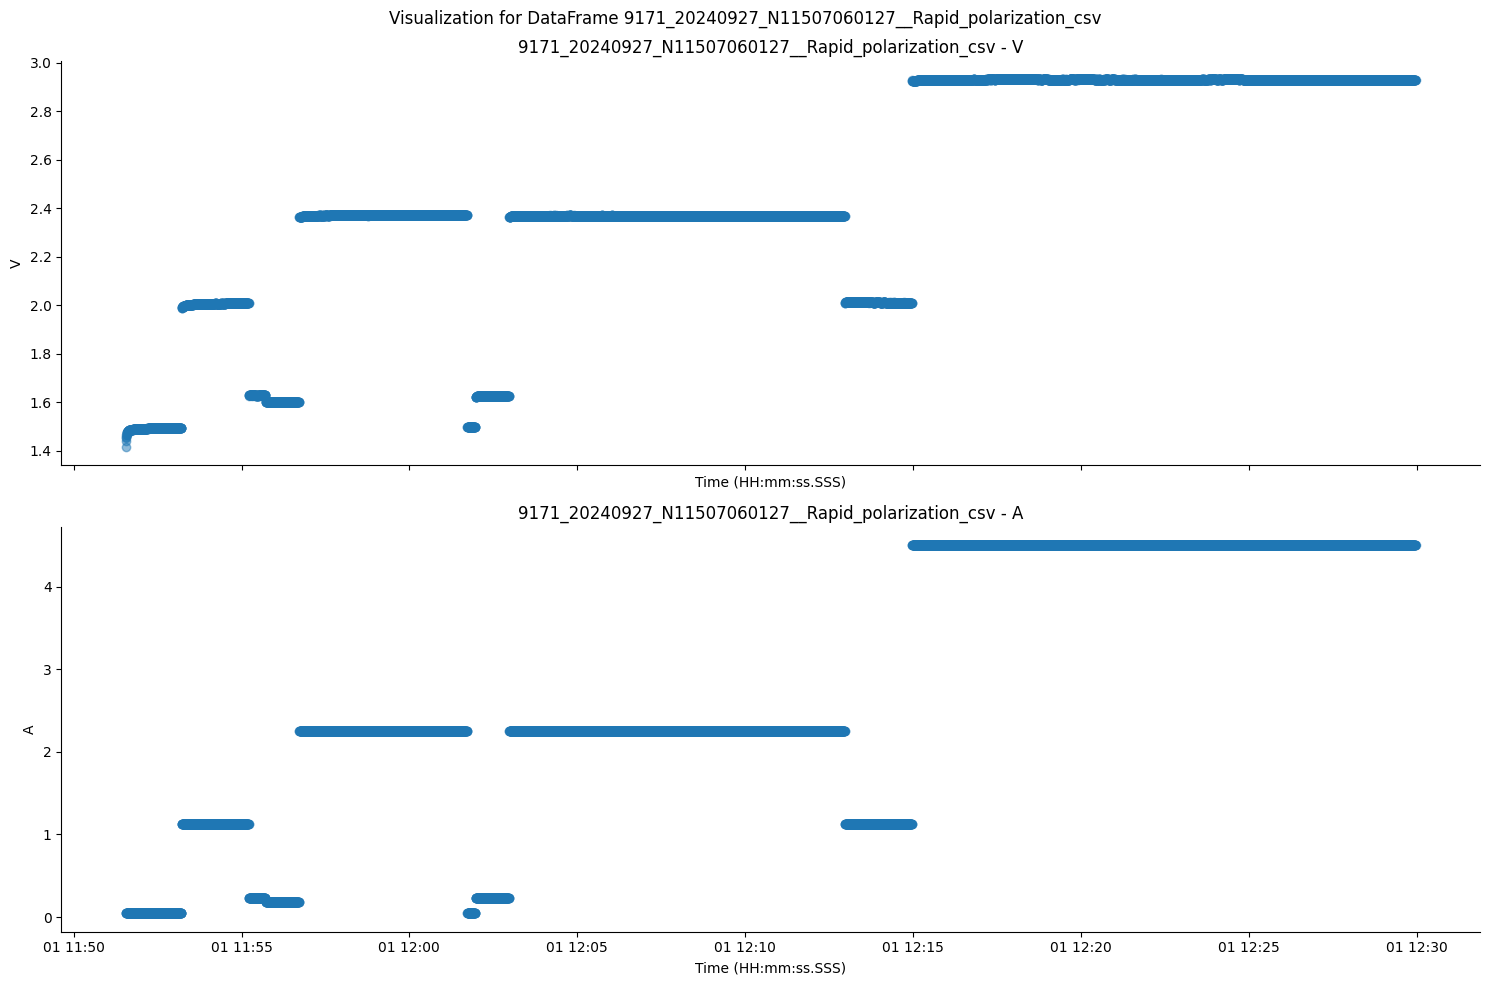

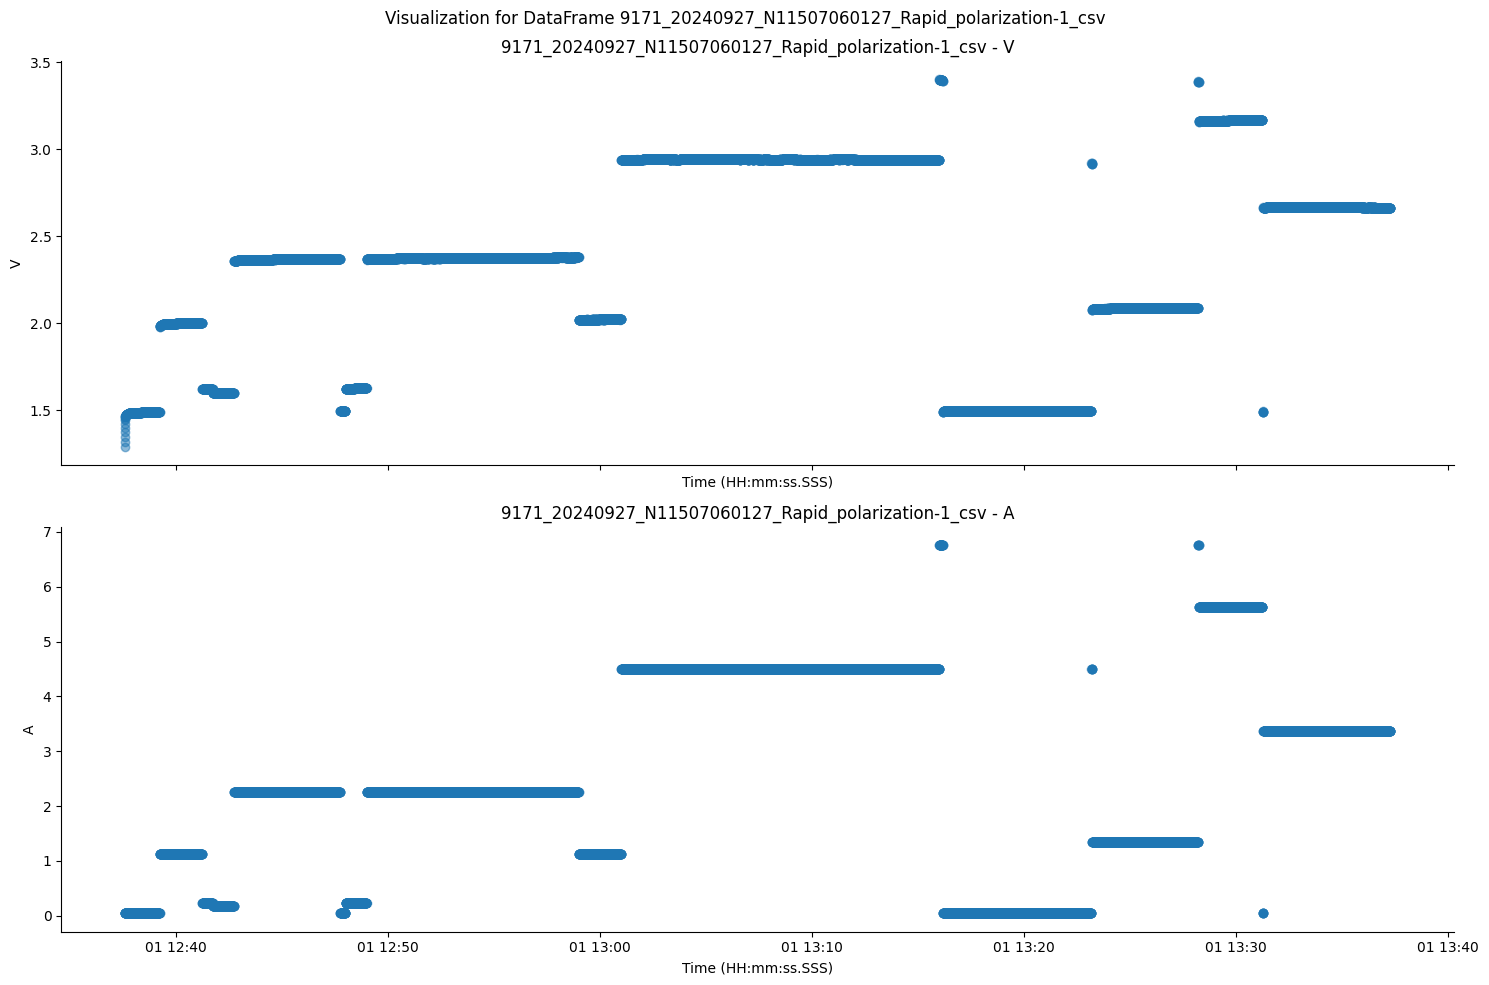

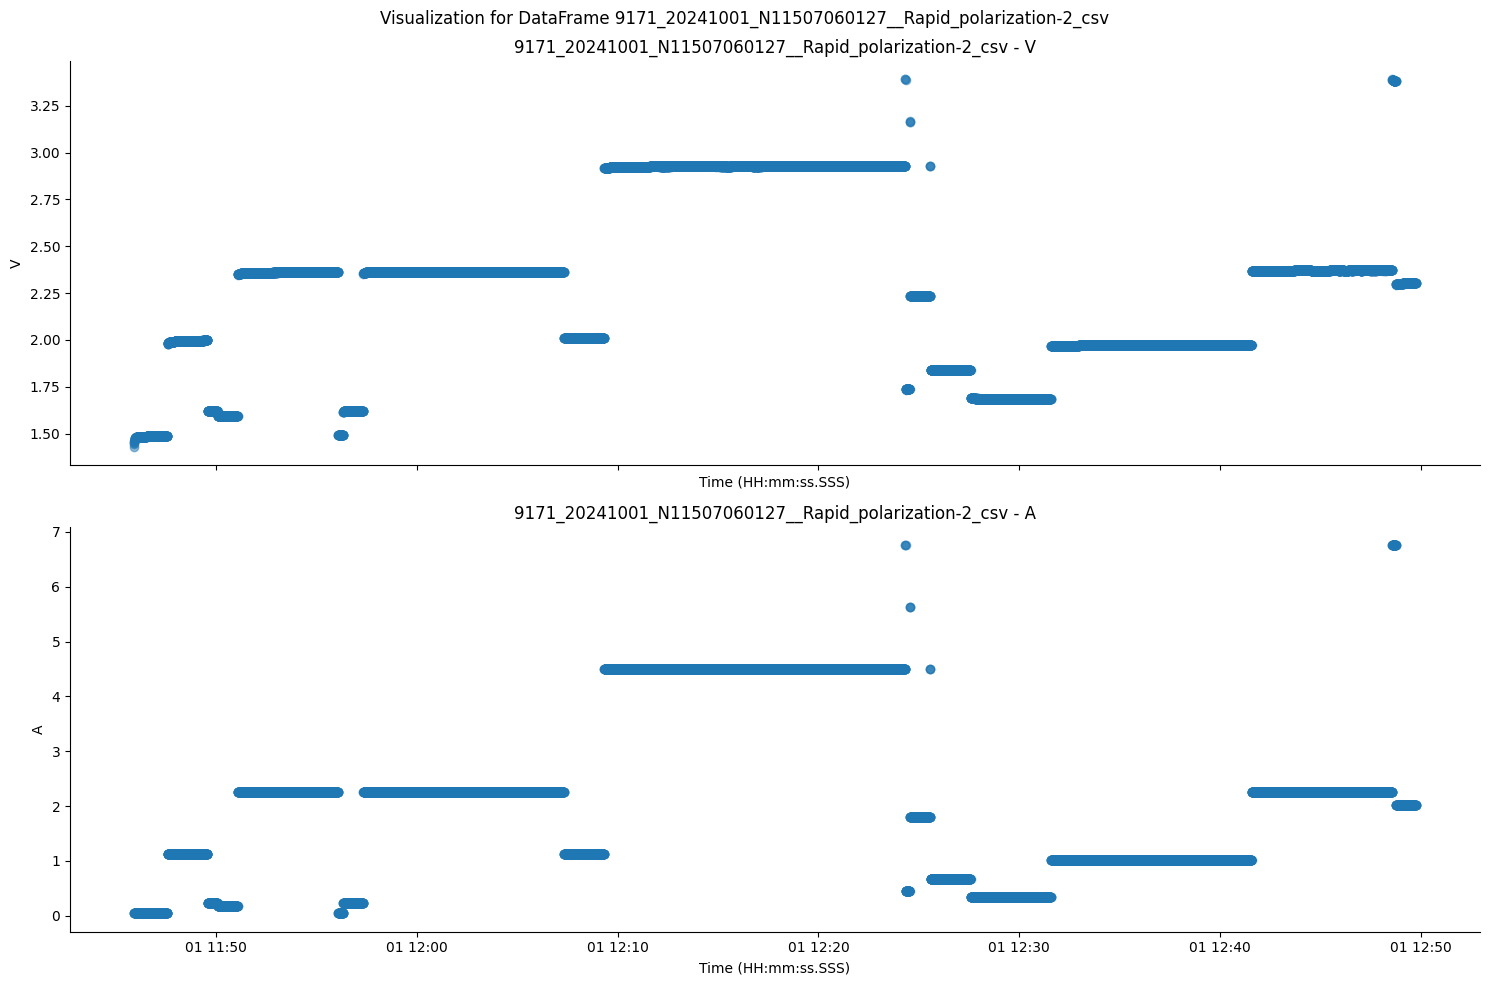

In [4]:
# Constants
TIME_COLUMN_NAME = 'Time (HH:mm:ss.SSS)'

# Create plots for each DataFrame
for key, df in dataframes.items():
    # Convert TIME_COLUMN_NAME to datetime with explicit format
    df[TIME_COLUMN_NAME] = pd.to_datetime(df[TIME_COLUMN_NAME], format='%H:%M:%S.%f', errors='coerce')
    
    # Ensure 'Channel', 'V', and 'A' are numeric
    df[['Channel', 'V', 'A']] = df[['Channel', 'V', 'A']].apply(pd.to_numeric, errors='coerce')
    
    # Plotting setup
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), sharex=True)
    fig.suptitle(f"Visualization for DataFrame {key}")
    
    # Scatter plots using plot_scatterplot_on_ax
    ptt.plot_scatterplot_on_ax(axs[0], df[TIME_COLUMN_NAME], df['V'], x_label=TIME_COLUMN_NAME, y_label='V', title=f"{key} - V")
    ptt.plot_scatterplot_on_ax(axs[1], df[TIME_COLUMN_NAME], df['A'], x_label=TIME_COLUMN_NAME, y_label='A', title=f"{key} - A")
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


In [ ]:
# # Assuming `load_csv_files` returns a dictionary of DataFrames keyed by file names
# for file_name, df in dataframes.items():
#     print(f"File: {file_name}")
#     print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
#     print("-" * 40)

In [5]:

# # Assign specific dataframes as validation, test, and training
# training_data = dataframes[list(dataframes.keys())[0]]  
# # test_data = dataframes[list(dataframes.keys())[1]].iloc[9900:].reset_index(drop=True)
# test_data = dataframes[list(dataframes.keys())[1]]      
# validation_data = dataframes[list(dataframes.keys())[2]].iloc[9900:].reset_index(drop=True)
# df =df4
df = dataframes[list(dataframes.keys())[2]]    

# print("Validation Data (df1):")
# print(validation_data.shape)
# print("\nTest Data (df2):")
# print(test_data.shape)
print("\nTraining Data (df3):")
print(df.shape)

# Remove rows with any null values
# validation_data = validation_data.dropna()
# print("Rows with null values removed. New shape:", validation_data.shape)

# test_data = test_data.dropna()
# print("Rows with null values removed. New shape:", test_data.shape)

df = df.dropna()
print("Rows with null values removed. New shape:", df.shape)


Training Data (df3):
(16383, 5)
Rows with null values removed. New shape: (16299, 5)


In [ ]:
# training_data['V'] = training_data['V'] - training_data['V'][0]
# validation_data['V'] = validation_data['V'] - validation_data['V'][0]
# test_data['V'] = test_data['V'] - test_data['V'][0]

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset (assuming it's in a DataFrame named 'df')
# Replace 'data.csv' with your file or use the DataFrame directly
# df = pd.read_csv("data.csv")

# Define feature columns and target column
feature_columns = 'A'  # Example features
target_column = 'V'  # Example target
# feature_columns = 'control/mA'  # Example features
# target_column = 'Ewe/V'  # Example target

# Extract features (X) and target (y)
X = df[feature_columns]
y = df[target_column]

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape x_train and x_test if they are 1D
if x_train.ndim == 1:
    x_train = x_train.values.reshape(-1, 1)
if x_test.ndim == 1:
    x_test = x_test.values.reshape(-1, 1)
    
# if y_train.ndim == 1:
#     y_train = x_train.values.reshape(-1, 1)
# if y_test.ndim == 1:
#     y_test = x_test.values.reshape(-1, 1)
    
if y_train.ndim == 1:
    y_train = x_train.reshape(-1, 1)
if y_test.ndim == 1:
    y_test = x_test.reshape(-1, 1)

# Print shapes of the splits
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (13039, 1)
X_test shape: (3260, 1)
y_train shape: (13039, 1)
y_test shape: (3260, 1)


In [7]:
print(f"X_train: {x_train}")
print(f"X_test head(): {x_test}")
print(f"y_train head(): {y_train}")
print(f"y_test head(): {y_test}")


X_train: [[0.675]
 [1.012]
 [1.012]
 ...
 [1.126]
 [2.251]
 [4.501]]
X_test head(): [[0.675]
 [2.251]
 [4.501]
 ...
 [0.181]
 [1.012]
 [4.501]]
y_train head(): [[0.675]
 [1.012]
 [1.012]
 ...
 [1.126]
 [2.251]
 [4.501]]
y_test head(): [[0.675]
 [2.251]
 [4.501]
 ...
 [0.181]
 [1.012]
 [4.501]]


In [ ]:
# Extract input and output columns for each dataset
# For validation set
# validation_x = validation_data['A'].values  # Input: Current (A)
# validation_y = validation_data['V'].values  # Output: Voltage (V)

# For test set
# test_x = test_data['A'].values  # Input: Current (A)
# test_y = test_data['V'].values  # Output: Voltage (V)

# # For training set
# training_data['A'] = (training_data['A'] - training_data['A'].mean()) / training_data['A'].std()
# training_data['V'] = (training_data['V'] - training_data['V'].mean()) / training_data['V'].std()


# train_x = training_data['A'].values  # Input: Current (A)
# train_y = training_data['V'].values  # Output: Voltage (V)

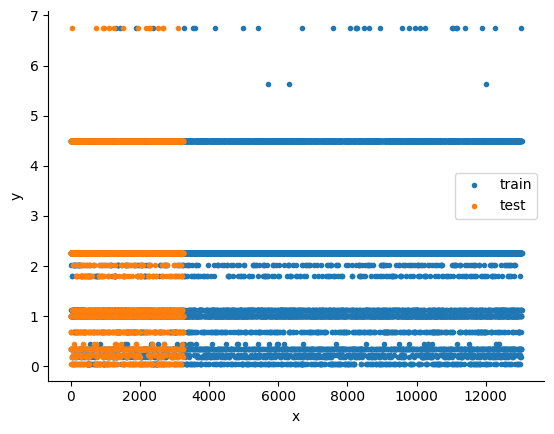

In [8]:
plt.plot(y_train, '.',label='train')  # Use extracted y_train
plt.plot(y_test, '.', label='test')    # Use extractedy_testy
# plt.plot(validation_y, '.', label='validation')  # Use extracted validation_y
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()


## Building a NARX Neural Network

In [9]:
torch.cuda.is_available()

False

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [11]:
basis_function = Polynomial(degree=1)

narx_net = NARXNN(
    ylag=2,
    xlag=2,
    basis_function=basis_function,
    model_type="NARMAX",
    loss_func="mse_loss",
    optimizer="Adam",
    epochs=20,
    verbose=False,
    device="cuda",
    optim_params={
        "betas": (0.9, 0.999),
        "eps": 1e-05,
    },  # optional parameters of the optimizer
)

WARNING - (py.warnings._showwarnmsg) - c:\Users\onyer\OneDrive\Desktop\Research work\1. Projects\Battery_Analysis1\env_analysis\Lib\site-packages\sysidentpy\neural_network\narx_nn.py:156: UserWarning: No CUDA available. We set the device as CPU
  self.device = self._check_cuda(device)



11-22 09:40:19 - WARNING - c:\Users\onyer\OneDrive\Desktop\Research work\1. Projects\Battery_Analysis1\env_analysis\Lib\site-packages\sysidentpy\neural_network\narx_nn.py:156: UserWarning: No CUDA available. We set the device as CPU
  self.device = self._check_cuda(device)



In [12]:
basis_function = Polynomial(degree=1)

regressors = regressor_code(
    X=x_train,
    xlag=2,
    ylag=2,
    model_type="NARMAX",
    model_representation="neural_network",
    basis_function=basis_function,
)

In [13]:
n_features = regressors.shape[0]  # the number of features of the NARX net
n_features

4

In [14]:
regressors

array([[1001],
       [1002],
       [2001],
       [2002]])

In [15]:
class NARX(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(n_features, 30)
        self.lin2 = nn.Linear(30, 30)
        self.lin3 = nn.Linear(30, 1)
        self.tanh = nn.Tanh()

    def forward(self, xb):
        z = self.lin(xb)
        z = self.tanh(z)
        z = self.lin2(z)
        z = self.tanh(z)
        z = self.lin3(z)
        return z

In [16]:
narx_net.net = NARX()

In [17]:
if device == "cuda":
    narx_net.net.to(torch.device("cuda"))

In [ ]:
# if y_train.ndim == 1:
#     y_train = y_train.values.reshape(-1, 1)
# if y_test.ndim == 1:
#     y_test = y_test.values.reshape(-1, 1)

In [18]:
print(x_train.shape)  # or print(x_train) if it's a numpy array
print(y_train.shape)
# x_train = np.array(x_train, dtype=float)
# y_train = np.array(y_train, dtype=float)

(13039, 1)
(13039, 1)


In [19]:
narx_net.fit(X=x_train, y=y_train, X_test=x_test, y_test=y_test)

In [20]:

yhat = narx_net.predict(X=x_test, y=y_test)

MSE:  2.2350960348617823


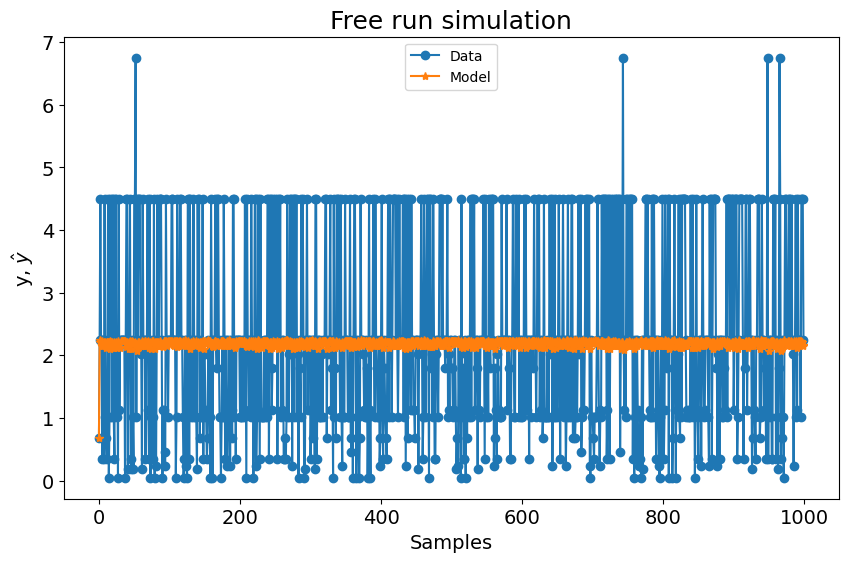

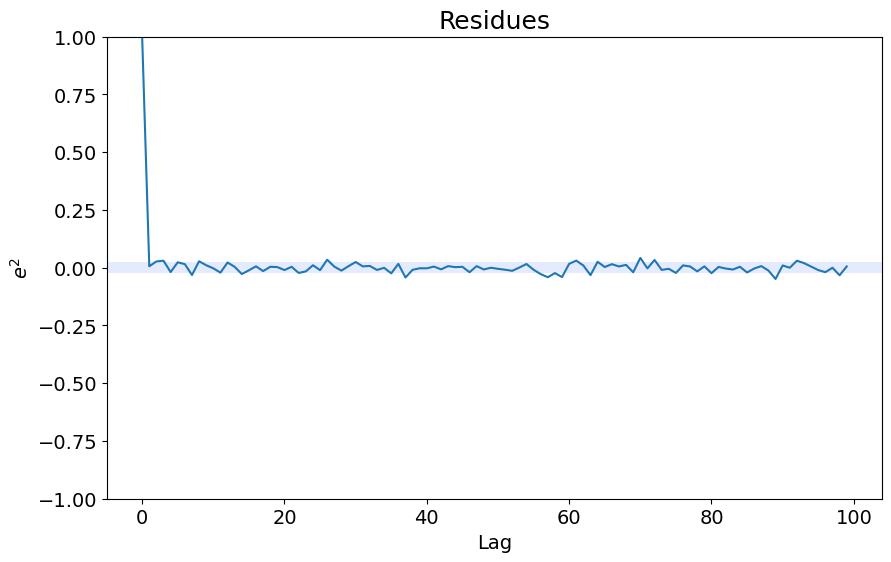

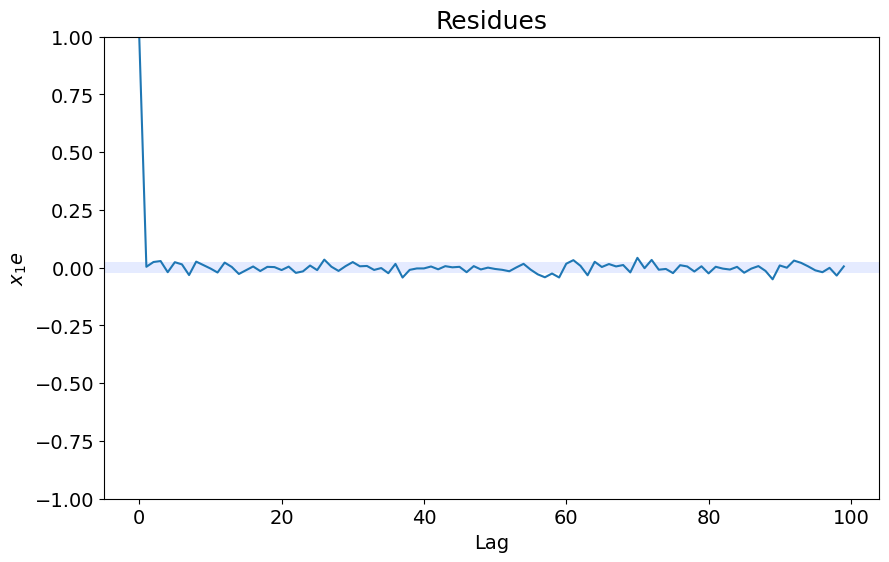

In [21]:
print("MSE: ", mean_squared_error(y_test, yhat))
plot_results(y=y_test, yhat=yhat, n=1000)
ee = compute_residues_autocorrelation(y_test, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(y_test, yhat, x_test)
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")

## MetaMSS, AOLS and FROLS

## FROLS

WARNING - (py.warnings._showwarnmsg) - c:\Users\onyer\OneDrive\Desktop\Research work\1. Projects\Battery_Analysis1\env_analysis\Lib\site-packages\sysidentpy\parameter_estimation\estimators.py:75: UserWarning: Psi matrix might have linearly dependent rows.Be careful and check your data
  self._check_linear_dependence_rows(psi)



11-22 09:43:40 - WARNING - c:\Users\onyer\OneDrive\Desktop\Research work\1. Projects\Battery_Analysis1\env_analysis\Lib\site-packages\sysidentpy\parameter_estimation\estimators.py:75: UserWarning: Psi matrix might have linearly dependent rows.Be careful and check your data
  self._check_linear_dependence_rows(psi)

2.234454863375852


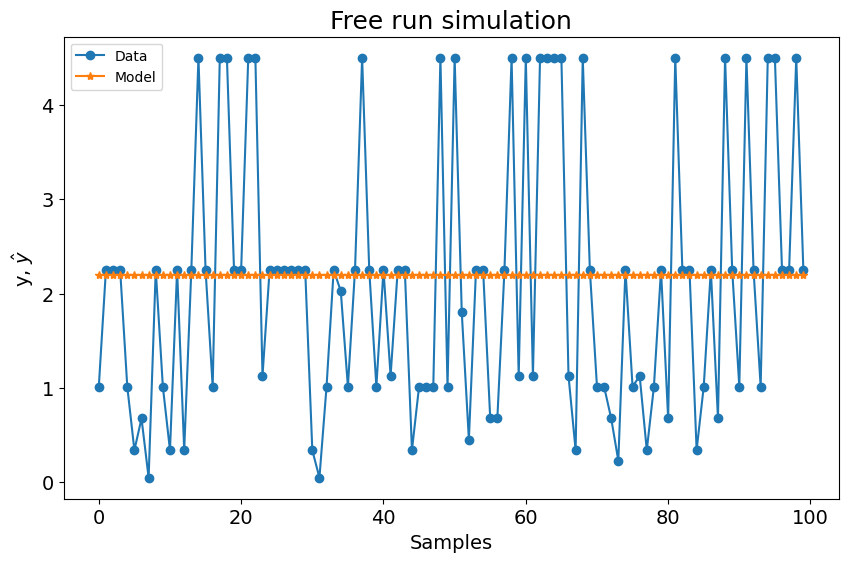

In [22]:
# files = ["\SanFrancisco_PV_GHI.csv", "\SanFrancisco_Hospital.csv"]
# raw = pd.read_csv(data_location + files[0])
# df = pd.DataFrame()
# df["ds"] = pd.date_range("1/1/2015 1:00:00", freq=str(60) + "Min", periods=(8760))
# df["y"] = raw.iloc[:, 0].values

# df_train, df_val = df.iloc[:7008, :], df.iloc[7008:, :]

# y = df["y"].values.reshape(-1, 1)
# y_train = df_train["y"].values.reshape(-1, 1)
# y_test = df_val["y"].values.reshape(-1, 1)

# x_train = df_train["ds"].dt.hour.values.reshape(-1, 1)
# x_test = df_val["ds"].dt.hour.values.reshape(-1, 1)

basis_function = Polynomial(degree=2)
sysidentpy = FROLS(
    order_selection=True,
    ylag=24,
    xlag=24,
    info_criteria="bic",
    basis_function=basis_function,
    model_type="NARMAX",
    estimator=LeastSquares(),
)

sysidentpy.fit(X=x_train, y=y_train)
x_test = np.concatenate([x_train[-sysidentpy.max_lag :], x_test])
y_test = np.concatenate([y_train[-sysidentpy.max_lag :], y_test])

yhat = sysidentpy.predict(X=x_test, y=y_test, steps_ahead=1)
sysidentpy_loss = loss(
    pd.Series(y_test.flatten()[sysidentpy.max_lag :]),
    pd.Series(yhat.flatten()[sysidentpy.max_lag :]),
)
print(sysidentpy_loss)


plot_results(y=y_test[-104:], yhat=yhat[-104:])

## MetaMSS

WARNING - (py.warnings._showwarnmsg) - c:\Users\onyer\OneDrive\Desktop\Research work\1. Projects\Battery_Analysis1\env_analysis\Lib\site-packages\sysidentpy\parameter_estimation\estimators.py:75: UserWarning: Psi matrix might have linearly dependent rows.Be careful and check your data
  self._check_linear_dependence_rows(psi)



11-22 09:47:07 - WARNING - c:\Users\onyer\OneDrive\Desktop\Research work\1. Projects\Battery_Analysis1\env_analysis\Lib\site-packages\sysidentpy\parameter_estimation\estimators.py:75: UserWarning: Psi matrix might have linearly dependent rows.Be careful and check your data
  self._check_linear_dependence_rows(psi)

2.2371789468222008


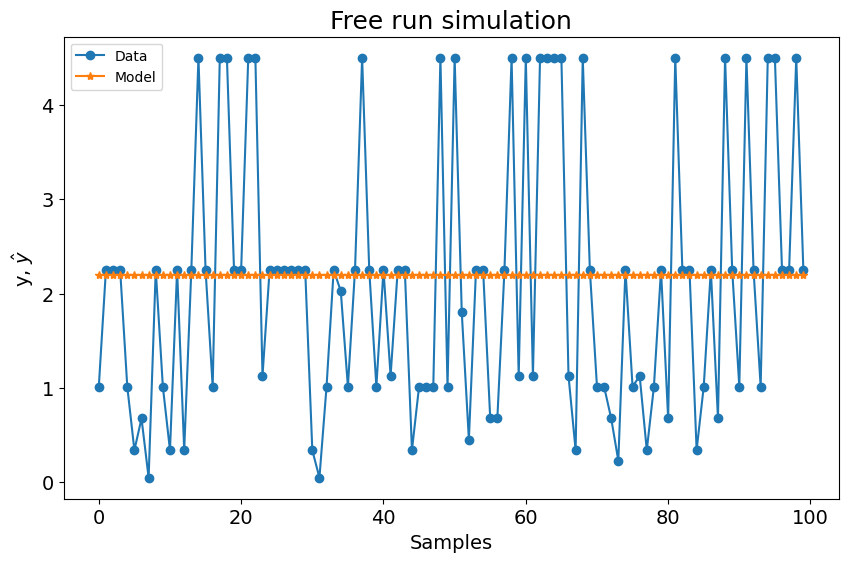

In [23]:
# set_random_seed(42)
# files = ["\SanFrancisco_PV_GHI.csv", "\SanFrancisco_Hospital.csv"]
# raw = pd.read_csv(data_location + files[0])
# df = pd.DataFrame()
# df["ds"] = pd.date_range("1/1/2015 1:00:00", freq=str(60) + "Min", periods=(8760))
# df["y"] = raw.iloc[:, 0].values

# df_train, df_val = df.iloc[:7008, :], df.iloc[7008:, :]

# y = df["y"].values.reshape(-1, 1)
# y_train = df_train["y"].values.reshape(-1, 1)
# y_test = df_val["y"].values.reshape(-1, 1)

# x_train = df_train["ds"].dt.hour.values.reshape(-1, 1)
# x_test = df_val["ds"].dt.hour.values.reshape(-1, 1)

basis_function = Polynomial(degree=1)
estimator = LeastSquares()
sysidentpy_metamss = MetaMSS(
    basis_function=basis_function,
    xlag=24,
    ylag=24,
    estimator=estimator,
    maxiter=10,
    steps_ahead=1,
    n_agents=15,
    loss_func="metamss_loss",
    model_type="NARMAX",
    random_state=42,
)
sysidentpy_metamss.fit(X=x_train, y=y_train)
x_test = np.concatenate([x_train[-sysidentpy_metamss.max_lag :], x_test])
y_test = np.concatenate([y_train[-sysidentpy_metamss.max_lag :], y_test])

yhat = sysidentpy_metamss.predict(X=x_test, y=y_test, steps_ahead=1)
metamss_loss = loss(
    pd.Series(y_test.flatten()[sysidentpy_metamss.max_lag :]),
    pd.Series(yhat.flatten()[sysidentpy_metamss.max_lag :]),
)
print(metamss_loss)


plot_results(y=y_test[-104:], yhat=yhat[-104:])

## AOLS

3.730765119453577


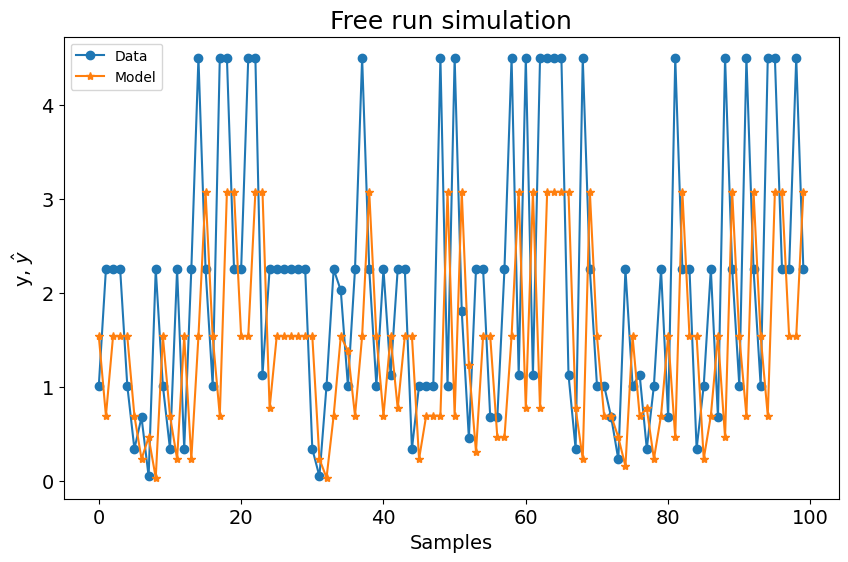

In [24]:
# set_random_seed(42)
# files = ["\SanFrancisco_PV_GHI.csv", "\SanFrancisco_Hospital.csv"]
# raw = pd.read_csv(data_location + files[0])
# df = pd.DataFrame()
# df["ds"] = pd.date_range("1/1/2015 1:00:00", freq=str(60) + "Min", periods=(8760))
# df["y"] = raw.iloc[:, 0].values

# df_train, df_val = df.iloc[:7008, :], df.iloc[7008:, :]

# y = df["y"].values.reshape(-1, 1)
# y_train = df_train["y"].values.reshape(-1, 1)
# y_test = df_val["y"].values.reshape(-1, 1)

# x_train = df_train["ds"].dt.hour.values.reshape(-1, 1)
# x_test = df_val["ds"].dt.hour.values.reshape(-1, 1)
basis_function = Polynomial(degree=1)
sysidentpy_AOLS = AOLS(
    ylag=24, xlag=24, k=2, L=1, model_type="NARMAX", basis_function=basis_function
)
sysidentpy_AOLS.fit(X=x_train, y=y_train)
x_test = np.concatenate([x_train[-sysidentpy_AOLS.max_lag :], x_test])
y_test = np.concatenate([y_train[-sysidentpy_AOLS.max_lag :], y_test])

yhat = sysidentpy_AOLS.predict(X=x_test, y=y_test, steps_ahead=1)
aols_loss = loss(
    pd.Series(y_test.flatten()[sysidentpy_AOLS.max_lag :]),
    pd.Series(yhat.flatten()[sysidentpy_AOLS.max_lag :]),
)
print(aols_loss)


plot_results(y=y_test[-104:], yhat=yhat[-104:])

In [ ]:
# # files = ["\SanFrancisco_PV_GHI.csv", "\SanFrancisco_Hospital.csv"]
# # raw = pd.read_csv(data_location + files[0])
# # df = pd.DataFrame()
# # df["ds"] = pd.date_range("1/1/2015 1:00:00", freq=str(60) + "Min", periods=(8760))
# # df["y"] = raw.iloc[:, 0].values

# # df_train, df_val = df.iloc[:7008, :], df.iloc[7008:, :]

# # y = df["y"].values.reshape(-1, 1)
# # y_train = df_train["y"].values.reshape(-1, 1)
# # y_test = df_val["y"].values.reshape(-1, 1)

# # x_train = df_train["ds"].dt.hour.values.reshape(-1, 1)
# # x_test = df_val["ds"].dt.hour.values.reshape(-1, 1)

# basis_function = Polynomial(degree=2)
# sysidentpy = FROLS(
#     order_selection=True,
#     ylag=24,
#     xlag=24,
#     info_criteria="bic",
#     basis_function=basis_function,
#     model_type="NARMAX",
#     estimator=LeastSquares(),
# )

# sysidentpy.fit(X=x_train, y=y_train)
# x_test = np.concatenate([x_train[-sysidentpy.max_lag :], x_test])
# y_test = np.concatenate([y_train[-sysidentpy.max_lag :], y_test])

# yhat = sysidentpy.predict(X=x_test, y=y_test, steps_ahead=1)
# sysidentpy_loss = loss(
#     pd.Series(y_test.flatten()[sysidentpy.max_lag :]),
#     pd.Series(yhat.flatten()[sysidentpy.max_lag :]),
# )
# print(sysidentpy_loss)


# plot_results(y=y_test[-104:], yhat=yhat[-104:])

In [ ]:
# # set_random_seed(42)
# # files = ["\SanFrancisco_PV_GHI.csv", "\SanFrancisco_Hospital.csv"]
# # raw = pd.read_csv(data_location + files[0])
# # df = pd.DataFrame()
# # df["ds"] = pd.date_range("1/1/2015 1:00:00", freq=str(60) + "Min", periods=(8760))
# # df["y"] = raw.iloc[:, 0].values

# # df_train, df_val = df.iloc[:7008, :], df.iloc[7008:, :]

# # y = df["y"].values.reshape(-1, 1)
# # y_train = df_train["y"].values.reshape(-1, 1)
# # y_test = df_val["y"].values.reshape(-1, 1)

# # x_train = df_train["ds"].dt.hour.values.reshape(-1, 1)
# # x_test = df_val["ds"].dt.hour.values.reshape(-1, 1)

# basis_function = Polynomial(degree=1)
# estimator = LeastSquares()
# sysidentpy_metamss = MetaMSS(
#     basis_function=basis_function,
#     xlag=24,
#     ylag=24,
#     estimator=estimator,
#     maxiter=10,
#     steps_ahead=1,
#     n_agents=15,
#     loss_func="metamss_loss",
#     model_type="NARMAX",
#     random_state=42,
# )
# sysidentpy_metamss.fit(X=x_train, y=y_train)
# x_test = np.concatenate([x_train[-sysidentpy_metamss.max_lag :], x_test])
# y_test = np.concatenate([y_train[-sysidentpy_metamss.max_lag :], y_test])

# yhat = sysidentpy_metamss.predict(X=x_test, y=y_test, steps_ahead=1)
# metamss_loss = loss(
#     pd.Series(y_test.flatten()[sysidentpy_metamss.max_lag :]),
#     pd.Series(yhat.flatten()[sysidentpy_metamss.max_lag :]),
# )
# print(metamss_loss)


# plot_results(y=y_test[-104:], yhat=yhat[-104:])

In [ ]:
# # set_random_seed(42)
# # files = ["\SanFrancisco_PV_GHI.csv", "\SanFrancisco_Hospital.csv"]
# # raw = pd.read_csv(data_location + files[0])
# # df = pd.DataFrame()
# # df["ds"] = pd.date_range("1/1/2015 1:00:00", freq=str(60) + "Min", periods=(8760))
# # df["y"] = raw.iloc[:, 0].values

# # df_train, df_val = df.iloc[:7008, :], df.iloc[7008:, :]

# # y = df["y"].values.reshape(-1, 1)
# # y_train = df_train["y"].values.reshape(-1, 1)
# # y_test = df_val["y"].values.reshape(-1, 1)

# # x_train = df_train["ds"].dt.hour.values.reshape(-1, 1)
# # x_test = df_val["ds"].dt.hour.values.reshape(-1, 1)
# basis_function = Polynomial(degree=1)
# sysidentpy_AOLS = AOLS(
#     ylag=24, xlag=24, k=2, L=1, model_type="NARMAX", basis_function=basis_function
# )
# sysidentpy_AOLS.fit(X=x_train, y=y_train)
# x_test = np.concatenate([x_train[-sysidentpy_AOLS.max_lag :], x_test])
# y_test = np.concatenate([y_train[-sysidentpy_AOLS.max_lag :], y_test])

# yhat = sysidentpy_AOLS.predict(X=x_test, y=y_test, steps_ahead=1)
# aols_loss = loss(
#     pd.Series(y_test.flatten()[sysidentpy_AOLS.max_lag :]),
#     pd.Series(yhat.flatten()[sysidentpy_AOLS.max_lag :]),
# )
# print(aols_loss)


# plot_results(y=y_test[-104:], yhat=yhat[-104:])

In [ ]:
# # set_random_seed(42)

# # # set_log_level("ERROR")
# # files = ["\SanFrancisco_PV_GHI.csv", "\SanFrancisco_Hospital.csv"]
# # raw = pd.read_csv(data_location + files[0])
# # df = pd.DataFrame()
# # df["ds"] = pd.date_range("1/1/2015 1:00:00", freq=str(60) + "Min", periods=(8760))
# # df["y"] = raw.iloc[:, 0].values

# m = NeuralProphet(
#     n_lags=24,
#     ar_sparsity=0.5,
#     # num_hidden_layers = 2,
#     # d_hidden=20,
# )
# metrics = m.fit(df, freq="H", valid_p=0.2)

# df_train, df_val = m.split_df(df, valid_p=0.2)
# m.test(df_val)

# future = m.make_future_dataframe(df_val, n_historic_predictions=True)
# forecast = m.predict(future)
# # fig = m.plot(forecast)
# print(loss(forecast["y"][24:-1], forecast["yhat1"][24:-1]))